In [ ]:
# Importing required libraries
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
# Reading the csv file using pandas
Movie_data = pd.read_csv("movie_metadata.csv")
# Creating a temporary working dataset
mv= Movie_data

In [ ]:
# Dropping the duplicate rows based on movie titles
mv.drop_duplicates(subset ="movie_title", 
                     keep = 'first', inplace = True)
# Subsetting 2 columns from the original dataset
dir = mv[['director_name','gross']]
# Grouping by director names
grp_director = dir.groupby('director_name',as_index=False)['gross'].sum()
# Sorting by total gross of each director
sort_by_gross_dir = grp_director.sort_values('gross',ascending=False)
# print(len(sort_by_gross_dir))
# Giving a blank index
blankIndex=[''] * len(sort_by_gross_dir)
sort_by_gross_dir.index=blankIndex

In [ ]:
# Filling missing rows of Gross column with 0 for calculations
mv['gross'] = mv['gross'].fillna(0.0)
# Drop the Nan valued rows in the dataset
mv = mv.dropna()
# Reassigning index to dataframe
mv.index = range(len(mv))

In [ ]:
# Initializing a dictionary 
dictionary={}
# Collecting unique actor names and adding their gross earnings
for i in range(len(mv)):
    if mv.actor_1_name[i] in dictionary:
        dictionary[mv.actor_1_name[i]] += mv.gross[i]
    else:
        dictionary[mv.actor_1_name[i]] = mv.gross[i]

for i in range(len(mv)):
    if mv.actor_2_name[i] in dictionary:
        dictionary[mv.actor_2_name[i]] += mv.gross[i]
    else:
        dictionary[mv.actor_2_name[i]] = mv.gross[i]
        
for i in range(len(mv)):
    if mv.actor_3_name[i] in dictionary:
        dictionary[mv.actor_3_name[i]] += mv.gross[i]
    else:
        dictionary[mv.actor_3_name[i]] = mv.gross[i]
# print(len(dictionary))
# Converting a dictionary into dataframe using pandas library
grp_actor = DataFrame(list(dictionary.items()),columns = ['Actor','Total_gross']) 
# Sorting based on the gross earnings
sort_by_gross_act = grp_actor.sort_values('Total_gross',ascending=False)
# Giving a blank index
blankIndex=[''] * len(sort_by_gross_act)
sort_by_gross_act.index=blankIndex

In [ ]:
def movie_program():
    %matplotlib inline
    plt.rcParams['figure.figsize'] = [8, 5]
    F1=False
    F2=False
    # Printing all the menu options to the user
    print(" 1.Most successful directors or actors \n 2.Film Comparison \n 3.Analyse the distribution of gross earnings \n 4.Genre Analysis \n 5.Earnings and IMDB scores \n 6.Exit")
    # Defining raise error class
    class NotValidError(UserWarning):
        pass
    # Accepting the user input
    while True:
        try: 
            mv_val = int(input("Please select one of the following options:"))
#             Valid error checks to restrict the user from entering any invalid number
            if ((mv_val <= 0) | (mv_val >= 7)):
                raise NotValidError
            break
            # Raises an error when user enters other than specified numbers 
        except NotValidError:
            print("The number entered is not a valid option, please try again.")
            # Raises an error when user enters characters 
        except :
            print("This was not a number, please try entering one of the above option numbers.")
# If 1st option from menu is choose
    if mv_val == 1:
        print(" 1. Top Directors \n 2. Top Actors")
        # Accepting the user input
        while True:
            try: 
                da_val = int(input("Please Select from above options: "))
                if ((da_val <= 0) | (da_val >= 3)):
                    raise NotValidError
                break
            except NotValidError:
                print("The number entered is not a valid option, please try again.")
            except :
                print("This was not a number, please try entering one of the above option numbers.")
        # For Directors
        if da_val == 1:
            while True:
                try: 
                    dno = int(input("How many director details you wish to see: "))
                    if ((dno <= 0) | (dno > 1853)):
                        raise NotValidError
                    break
                except NotValidError:
                    print("The number entered is either too high or too low, please try again.")
                except :
                    print("This was not a number, please try entering one of the above option numbers.")

            print(sort_by_gross_dir.iloc[0:dno,0])
            # Create the bars on the plot
            plt.bar(x=range(dno),
                    height=sort_by_gross_dir[0:dno]['gross'])
            # Change the xticks to the correct names of director
            plt.xticks(range(dno), sort_by_gross_dir[0:dno]['director_name'], 
                       rotation=60)
            # Set up the x, y labels, titles, and linestyles etc.
            plt.ylabel("Gross")
            plt.xlabel("Director Name")
            plt.title("Graph of Top directors")
            plt.show()
        # For Actors
        elif da_val == 2:
            
            while True:
                try: 
                    ano=int(input("How many actor details you wish to see: "))
                    if ((ano <= 0) | (ano > 4888)):
                        raise NotValidError
                    break
                except NotValidError:
                    print("The number entered is either too high or too low, please try again.")
                except :
                    print("This was not a number, please try entering one of the above option numbers.")

            print (sort_by_gross_act.iloc[0:ano,0])
            # Create the bars on the plot
            plt.bar(x=range(ano), # start off with the xticks as numbers 0:19
                    height=sort_by_gross_act[0:ano]['Total_gross'])
            # Change the xticks to the correct actor names
            plt.xticks(range(ano), sort_by_gross_act[0:ano]['Actor'], 
                       rotation=60)
            # Set up the x, y labels, titles, and linestyles etc.
            plt.ylabel("Gross")
            plt.xlabel("Actor Name")
            plt.title("Graph of Top actors")
            plt.show()
        # Calling the menu again
        movie_program()
    # If 2nd option from menu is choose
    elif mv_val == 2:
        while F1==False:
            # Taking user input film name
            Film_1 = (input("Please Enter the name of First Film: ")).lower()
            # Checking if the database contains a similar name
            if mv['movie_title'].str.lower().str.contains(Film_1).any():
                print('Name of Film 1 is',Film_1)
                F1=True
                df1 = mv[mv['movie_title'].str.lower().str.contains(Film_1)] 
                # Storing IMDB Scores
                imdb1 = df1.iloc[0,25:26]
                # Storing gross earnings
                gross1 = df1.iloc[0,8:9]
                # Storing facebook likes 
                fb_like1 = df1.iloc[0,-1]
                
        # Similarly for Film 2
        while F2==False:
            Film_2 = (input("Please Enter the name of Second Film: ")).lower()
            if mv['movie_title'].str.lower().str.contains(Film_2).any():
                print('Name of Film 2 is',Film_2)
                F2=True
                df2 = mv[mv['movie_title'].str.lower().str.contains(Film_2)] 
                imdb2 = df2.iloc[0,25:26]
                gross2 = df2.iloc[0,8:9]
                fb_like2 = df2.iloc[0,-1]
                

        print(" 1. IMDB Scores \n 2. Gross Earnings \n 3. Movie Facebook Like ")
        while True:
            try: 
                # Taking user inputs as in what they need to compare 
                Film_comp = int(input("Please enter from above options: "))
                if ((Film_comp <= 0) | (Film_comp >= 4)):
                    raise NotValidError
                break
            except NotValidError:
                print("The number entered is not a valid option, please try again.")
            except :
                print("This was not a number, please try entering one of the above option numbers.")
        # Barplots for each comparison with dedicated lables 
        if Film_comp == 1:
            plt.bar(0.30, imdb1, color = 'b',width = 0.10, label = "IMDB of Film 1")
            plt.bar(0.45, imdb2, color = 'g',width = 0.10, label = "IMDB of Film 2")
            plt.legend(loc="upper left")
            # Set up the x, y labels, titles, and linestyles etc.
            plt.xlabel("Compare IMDB Scores")
            plt.title("Graph of IMDB Score Comparison")
            plt.show()
        elif Film_comp == 2:
            plt.bar(0.30, gross1, color = 'b',width = 0.10, label = "Gross of Film 1")
            plt.bar(0.45, gross2, color = 'g',width = 0.10, label = "Gross of Film 2")
            plt.legend(loc="upper left")
            plt.xlabel("Compare Gross Earnings")
            plt.title("Graph of Gross Earning Comparison")
            plt.show()
        elif Film_comp == 3:
            plt.bar(0.30, fb_like1, color = 'b',width = 0.10, label = "Facebook likes of Film 1")
            plt.bar(0.45, fb_like2, color = 'g',width = 0.10, label = "Facebook likes of Film 2")
            plt.legend(loc="upper left")
            plt.xlabel("Compare Facebook likes")
            plt.title("Graph of Facebook Like Comparison")
            plt.show()
        movie_program()
    # When Option 3 is selected
    elif mv_val ==3:
        while True:
            try: 
               # Taking input for start year
                Year_1 = int(input("Enter a Start year: "))
                if ((Year_1 < 1916) | (Year_1 > 2016)):
                    raise NotValidError
                break
            except NotValidError:
                print("The year entered is not a valid , please try between 1916 to 2016")
            except :
                print("This was not a number, please try entering one of the above option numbers.")
        while True:
            try: 
                # Taking input for end year
                Year_2 = int(input("Enter a End year: "))
                if ((Year_2 < 1916) | (Year_2 > 2016) | (Year_2 < Year_1)):
                    raise NotValidError
                break 
            except NotValidError:
                print("The year entered is not a valid , please try between 1916 to 2016")
            except :
                print("This was not a number, please try entering one of the above option numbers.")
        # Creating a subset of only year and gross
        year_sub = mv[['title_year','gross']]
        # Collecting only those years that falss between the user entered years
        Year_12 = year_sub[(year_sub['title_year']>=Year_1) & (year_sub['title_year'] <=Year_2)]
        grp_min = Year_12.groupby('title_year',as_index=False)['gross'].min()
        grp_max = Year_12.groupby('title_year',as_index=False)['gross'].max()
        grp_avg = Year_12.groupby('title_year',as_index=False)['gross'].mean()
        plt.plot(grp_avg.iloc[:,0:1],grp_avg.iloc[:,-1],label = 'Average')
        plt.plot(grp_min.iloc[:,0:1],grp_min.iloc[ :,-1],label = 'Minimum')
        plt.plot(grp_max.iloc[:,0:1],grp_max.iloc[:,-1],label = 'Maximum')
        plt.legend(loc="upper left")
        plt.title("Gross Earning Distribution", fontsize=16, fontweight='bold')
        plt.xlabel("Year")
        plt.ylabel("Total Gross earnings")
        plt.show()
        # Caling the function again after the output is plotted
        movie_program()
    # When the option 4 is choosen 
    elif mv_val == 4:
        imdb=0
        c=0
        # Splitting the genres based on "|"
        gen = pd.DataFrame(mv['genres'].str.split('|').tolist()).stack()
        print(gen.unique())
        # Converting the genre to lower case
        genre = (input("Please enter your favourite Genre: ")).lower()
        # Choosing only genres and imdb scores and formin a subset
        gen_sub = mv[['genres','imdb_score']]
        # Checking the user entered genre with the genre in the dataset
        if (gen_sub['genres'].str.lower().str.contains(genre).any()):
            result_df = gen_sub['genres'].str.lower().str.contains(genre)
            for i in range(len(result_df)):
                if result_df[i] == True:
                    c+=1
                    imdb += gen_sub.iloc[i,-1]
            print("The average IMDB Score is ",round(imdb/c))
        else:
            print("Not a correct genre")

        movie_program()
    # If user choose option 5 
    elif mv_val == 5:
        # Selecting variables except having dtypes object
        num_mv = mv.select_dtypes(exclude=['object'])
        print("The number of rows and columns of the dataset",num_mv.shape)
        # Plotting scatterplots of gross, voted users, Critic for reviews and year with respect to IMDB Score
        plt.scatter(num_mv.gross,num_mv.imdb_score)
        plt.ylabel("IMDB Score")
        plt.xlabel("Gross Earnings")
        plt.title("IMDB Scores vs Gross Earnings")
        plt.show()
        plt.scatter(num_mv.num_voted_users,num_mv.imdb_score,)
        plt.ylabel("IMDB Score")
        plt.xlabel("Number of Voted Users")
        plt.title("IMDB Scores vs Voted Users")
        plt.show()
        plt.scatter(num_mv.num_critic_for_reviews,num_mv.imdb_score,)
        plt.ylabel("IMDB Score")
        plt.xlabel("Number of Critic for reviews")
        plt.title("IMDB Scores vs Critic for reviews")
        plt.show()
        plt.scatter(num_mv.title_year,num_mv.imdb_score,)
        plt.ylabel("IMDB Score")
        plt.xlabel("Year")
        plt.title("IMDB Scores vs Year")
        plt.show()
        # Plotting correlation plots between all the variables with seaborn
        f,ax = plt.subplots(figsize=(10, 8))
        corr = num_mv.corr()
        sns.heatmap(corr,cmap = 'viridis', vmax=1.0,vmin=0.0, linewidths = 0.1, annot = True,
                    square=True,
                    xticklabels=corr.columns.values,
                    yticklabels=corr.columns.values)
        # Plotting histograms of all the numeric variable in the dataset
        num_mv.hist(figsize=(16,20), bins = 50, xlabelsize=8, ylabelsize=8)
        # Mostly the data is right skewed except imdb_score and title_year which is left skewed
        # Plotting pairplot with the help of seaborn of all the variables 
        sns.pairplot(num_mv)
        plt.show()
        movie_program()
    # If the user chooses option 6
    else:
        print("Thank You! See you soon")
        # This exits from the application

**Main Program**

 1.Most successful directors or actors 
 2.Film Comparison 
 3.Analyse the distribution of gross earnings 
 4.Genre Analysis 
 5.Earnings and IMDB scores 
 6.Exit
Please select one of the following options:4
['Action' 'Adventure' 'Fantasy' 'Sci-Fi' 'Thriller' 'Romance' 'Animation'
 'Comedy' 'Family' 'Musical' 'Mystery' 'Western' 'Drama' 'History' 'Sport'
 'Crime' 'Horror' 'War' 'Biography' 'Music' 'Documentary' 'Film-Noir']
Please enter your favourite Genre: Thriller
The average IMDB Score is  6.0
 1.Most successful directors or actors 
 2.Film Comparison 
 3.Analyse the distribution of gross earnings 
 4.Genre Analysis 
 5.Earnings and IMDB scores 
 6.Exit
Please select one of the following options:2
Please Enter the name of First Film: Mirage
Please Enter the name of First Film: The great hypnotist
Please Enter the name of First Film: bbb
Please Enter the name of First Film: 6
Name of Film 1 is 6
Please Enter the name of Second Film: 6
Name of Film 2 is 6
 1. IMDB Scores 
 2. Gross E

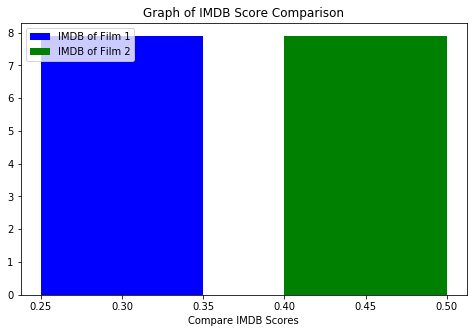

 1.Most successful directors or actors 
 2.Film Comparison 
 3.Analyse the distribution of gross earnings 
 4.Genre Analysis 
 5.Earnings and IMDB scores 
 6.Exit
Please select one of the following options:6
Thank You! See you soon


In [ ]:
movie_program()